<a href="https://colab.research.google.com/github/RobertoSam/EcuacionesDiferenciales---MMCA/blob/main/OrbitaDeUnSatelite_MRK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

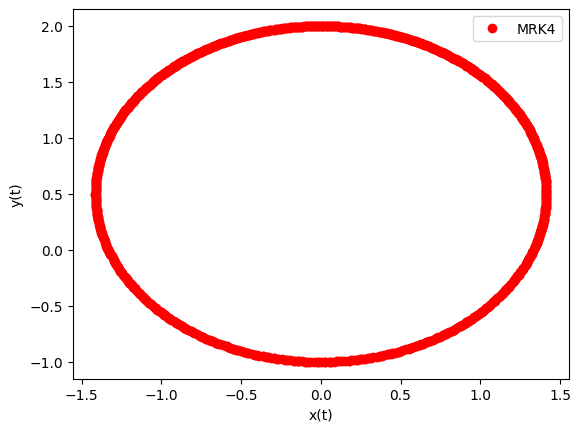

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def f(t,z,g,m):
    r = (z[0]**2 + z[2]**2)**(3/2)
    ftz = np.zeros((4,1))
    ftz[0] = z[1]
    ftz[1] = -g*m*z[0]/r
    ftz[2] = z[3]
    ftz[3] = -g*m*z[2]/r
    return ftz

def MEuE(t0,tn,n,Z0,g,m):
    #u0 = Z0
    h = (tn - t0)/n
    #v = np.zeros((n+1,2))
    #v[0,0] = t0
    #v[0,1] = u0
    v = np.array([[t0, Z0[0,0], Z0[1,0], Z0[2,0], Z0[3,0]]])
    ti = t0
    ui = Z0
    for i in range(0,n):
        ui = ui + h*f(ti,ui,g,m)
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.append(v,[row],axis=0)
    #v[i+1,0] = ti
        #v[i+1,1] = ui

    return v

def MRK2a(t0,tn,n,Z0,g,m):
    #u0 = Z0
    h = (tn - t0)/n
    #v = np.zeros((n+1,2))
    #v[0,0] = t0
    #v[0,1] = u0
    v = np.array([[t0, Z0[0,0], Z0[1,0], Z0[2,0], Z0[3,0]]])
    ti = t0
    ui = Z0
    for i in range(0,n):
        k1 = f(ti,ui,g,m)
        k2 = f(ti + h,ui + h*k1,g,m)
        ui = ui + h*(k1 + k2)/2
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.append(v,[row],axis=0)
    #v[i+1,0] = ti
        #v[i+1,1] = ui
    return v

def MRK2b(t0,tn,n,Z0,g,m):
    #u0 = Z0
    h = (tn - t0)/n
    #v = np.zeros((n+1,2))
    #v[0,0] = t0
    #v[0,1] = u0
    v = np.array([[t0, Z0[0,0], Z0[1,0], Z0[2,0], Z0[3,0]]])
    ti = t0
    ui = Z0
    for i in range(0,n):
        k1 = f(ti,ui,g,m)
        k2 = f(ti + h/2,ui + h*k1/2,g,m)
        ui = ui + h*k2
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.append(v,[row],axis=0)
    #v[i+1,0] = ti
        #v[i+1,1] = ui
    return v

def MRK4(t0,tn,n,Z0,g,m):
    #u0 = Z0
    h = (tn - t0)/n
    #v = np.zeros((n+1,2))
    #v[0,0] = t0
    #v[0,1] = u0
    v = np.array([[t0, Z0[0,0], Z0[1,0], Z0[2,0], Z0[3,0]]])
    ti = t0
    ui = Z0
    for i in range(0,n):
        k1 = f(ti,ui,g,m)
        k2 = f(ti + h/2,ui + h*k1/2,g,m)
        k3 = f(ti + h/2,ui + h*k2/2,g,m)
        k4 = f(ti + h,ui + h*k3,g,m)
        ui = ui + h*(k1 + 2*k2 + 2*k3 + k4)/6
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.append(v,[row],axis=0)
    #v[i+1,0] = ti
        #v[i+1,1] = ui
    return v

t0 = 0
tn = 100
n = 1000

# Condicion inicial
Z0 = np.zeros((4,1))
Z0[0] = 0
Z0[1] = 1
Z0[2] = 2
Z0[3] = 0
g = 1
m = 3*g
#w1 = MRK2a(t0,tn,n,Z0,g,m)

#w1 = MRK2b(t0,tn,n,Z0,g,m)

w1 = MRK4(t0,tn,n,Z0,g,m)

plt.plot(w1[:,1],w1[:,3],'or',label='MRK4')
#t = np.linspace(t0,tn,50)
#plt.plot(t,yt(t),label='$x(t)$')
plt.legend()
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

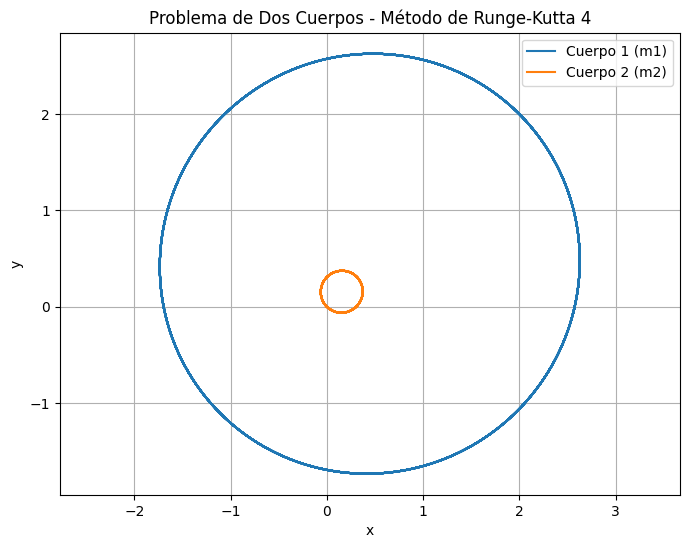

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constante gravitacional
G = 1.0

# Masas
m1 = 0.03
m2 = 0.3

# Sistema de ecuaciones diferenciales
def f(t, z):
    z1, z2, z3, z4, z5, z6, z7, z8 = z

    dx = z5 - z1
    dy = z7 - z3
    r = np.sqrt(dx**2 + dy**2)
    r3 = r**3

    dz1 = z2
    dz2 = G * m2 * dx / r3
    dz3 = z4
    dz4 = G * m2 * dy / r3

    dx_rev = -dx
    dy_rev = -dy
    r_rev3 = r3  # misma distancia

    dz5 = z6
    dz6 = G * m1 * dx_rev / r_rev3
    dz7 = z8
    dz8 = G * m1 * dy_rev / r_rev3

    return np.array([dz1, dz2, dz3, dz4, dz5, dz6, dz7, dz8])

# Método de Runge-Kutta 4
def rk4(f, z0, t):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i])
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2)
        k4 = f(t[i] + h, Z[i] + h * k3)
        Z[i+1] = Z[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return Z

# Condiciones iniciales
z0 = np.array([
    2.0,  0.2,     # x1, v1x
    2.0, -0.2,     # y1, v1y
    0.0, -0.02,    # x2, v2x
    0.0,  0.02     # y2, v2y
])

# Intervalo de tiempo
T = 500
h = 0.01
t = np.arange(0, T+h, h)

# Integrar
Z = rk4(f, z0, t)

# Extraer posiciones
x1, y1 = Z[:,0], Z[:,2]
x2, y2 = Z[:,4], Z[:,6]

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Cuerpo 1 (m1)', lw=1.5)
plt.plot(x2, y2, label='Cuerpo 2 (m2)', lw=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Problema de Dos Cuerpos - Método de Runge-Kutta 4')
plt.axis('equal')
plt.show()


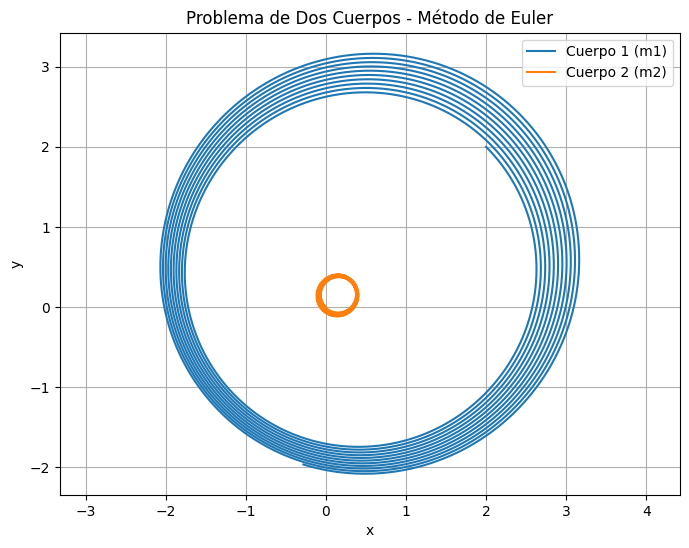

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constante gravitacional
G = 1.0

# Masas
m1 = 0.03
m2 = 0.3

# Sistema de EDOs
def f(t, z):
    z1, z2, z3, z4, z5, z6, z7, z8 = z

    dx = z5 - z1
    dy = z7 - z3
    r = np.sqrt(dx**2 + dy**2)
    r3 = r**3

    dz1 = z2
    dz2 = G * m2 * dx / r3
    dz3 = z4
    dz4 = G * m2 * dy / r3
    dz5 = z6
    dz6 = G * m1 * (-dx) / r3
    dz7 = z8
    dz8 = G * m1 * (-dy) / r3

    return np.array([dz1, dz2, dz3, dz4, dz5, dz6, dz7, dz8])

# Método de Euler
def euler(f, z0, t):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        Z[i+1] = Z[i] + h * f(t[i], Z[i])
    return Z

# Condiciones iniciales
z0 = np.array([
    2.0,  0.2,     # x1, v1x
    2.0, -0.2,     # y1, v1y
    0.0, -0.02,    # x2, v2x
    0.0,  0.02     # y2, v2y
])

# Intervalo de tiempo
T = 500
h = 0.01
t = np.arange(0, T+h, h)

# Integrar
Z = euler(f, z0, t)

# Extraer posiciones
x1, y1 = Z[:,0], Z[:,2]
x2, y2 = Z[:,4], Z[:,6]

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Cuerpo 1 (m1)', lw=1.5)
plt.plot(x2, y2, label='Cuerpo 2 (m2)', lw=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Problema de Dos Cuerpos - Método de Euler')
plt.axis('equal')
plt.show()


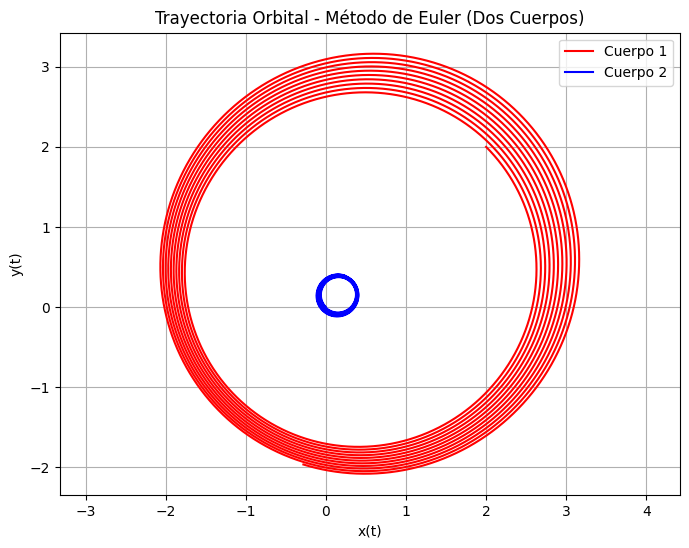

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the gravitational force
def f(t, z, G, m1, m2):
    r = ((z[4] - z[0])**2 + (z[6] - z[2])**2)**(3/2)
    ftz = np.zeros((8, 1))
    ftz[0] = z[1]
    ftz[1] = G * m2 * (z[4] - z[0]) / r
    ftz[2] = z[3]
    ftz[3] = G * m2 * (z[6] - z[2]) / r
    ftz[4] = z[5]
    ftz[5] = G * m1 * (z[0] - z[4]) / r
    ftz[6] = z[7]
    ftz[7] = G * m1 * (z[2] - z[6]) / r
    return ftz

# Define the Euler method for solving the differential equation
def MEuE(t0, tn, n, Z0, G, m1, m2):
    h = (tn - t0) / n
    v = np.array([[t0] + Z0.flatten().tolist()])
    ti = t0
    ui = Z0
    for i in range(n):
        ui = ui + h * f(ti, ui, G, m1, m2)
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.vstack([v, row])
    return v


# Intervalo de tiempo
T = 500
h = 0.01
t = np.arange(0, T+h, h)

Z0 = np.zeros((8, 1))
Z0[0] = 2.0      # x1
Z0[1] = 0.2      # x1'
Z0[2] = 2.0      # y1
Z0[3] = -0.2     # y1'
Z0[4] = 0.0      # x2
Z0[5] = -0.02    # x2'
Z0[6] = 0.0      # y2
Z0[7] = 0.02     # y2'

G = 1
m1 = 0.03
m2 = 0.3

# Solve the differential equation using the Euler method
w1 = MEuE(t0, tn, n, Z0, G, m1, m2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(w1[:,1], w1[:,3], 'r-', label='Cuerpo 1')
plt.plot(w1[:,5], w1[:,7], 'b-', label='Cuerpo 2')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trayectoria Orbital - Método de Euler (Dos Cuerpos)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

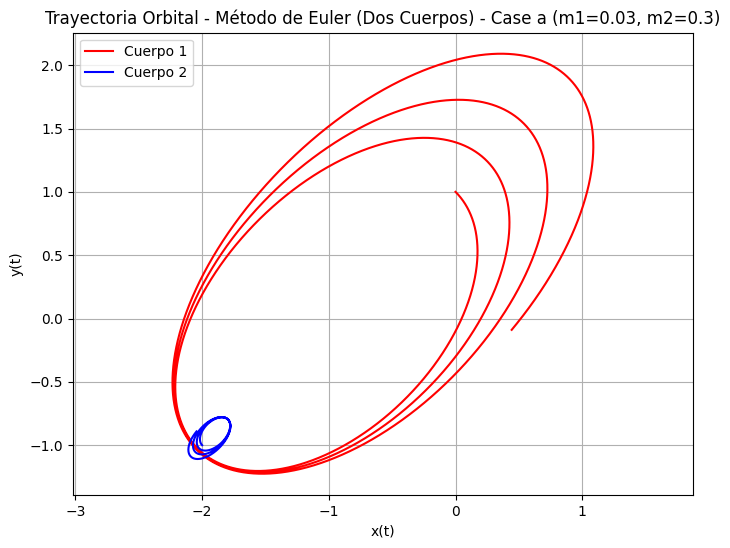

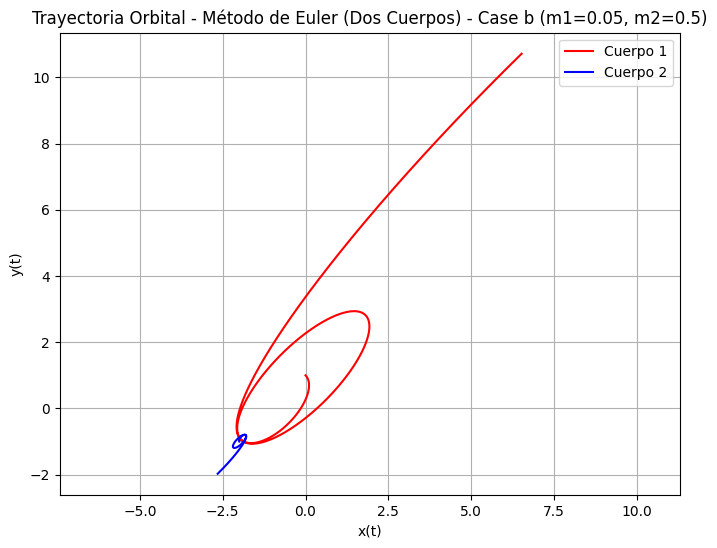

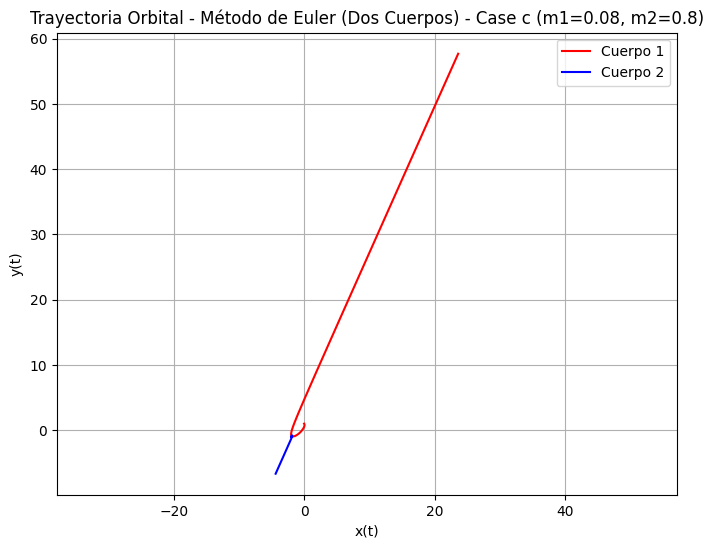

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the gravitational force
def f(t, z, G, m1, m2):
    r = ((z[4] - z[0])**2 + (z[6] - z[2])**2)**(3/2)
    ftz = np.zeros((8, 1))
    ftz[0] = z[1]
    ftz[1] = G * m2 * (z[4] - z[0]) / r
    ftz[2] = z[3]
    ftz[3] = G * m2 * (z[6] - z[2]) / r
    ftz[4] = z[5]
    ftz[5] = G * m1 * (z[0] - z[4]) / r
    ftz[6] = z[7]
    ftz[7] = G * m1 * (z[2] - z[6]) / r
    return ftz

# Define the Euler method for solving the differential equation
def MEuE(t0, tn, n, Z0, G, m1, m2):
    h = (tn - t0) / n
    v = np.array([[t0] + Z0.flatten().tolist()])
    ti = t0
    ui = Z0
    for i in range(n):
        ui = ui + h * f(ti, ui, G, m1, m2)
        ti += h
        row = np.hstack(([ti], ui.flatten()))
        v = np.vstack([v, row])
    return v

# Set initial conditions and parameters
t0 = 0
tn = 100
n = 50000

Z0 = np.zeros((8, 1))
Z0[0] = 0.0      # x1
Z0[1] = 0.1      # x1'
Z0[2] = 1.0      # y1
Z0[3] = -0.1     # y1'
Z0[4] = -2.0     # x2
Z0[5] = -0.01    # x2'
Z0[6] = -1.0      # y2
Z0[7] = 0.01     # y2'

G = 1

# Define different mass combinations
mass_combinations = [
    (0.03, 0.3),
    (0.05, 0.5),
    (0.08, 0.8)
]

# Iterate through mass combinations and plot results
for i, (m1, m2) in enumerate(mass_combinations):
    # Solve the differential equation using the Euler method
    w1 = MEuE(t0, tn, n, Z0, G, m1, m2)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(w1[:,1], w1[:,3], 'r-', label='Cuerpo 1')
    plt.plot(w1[:,5], w1[:,7], 'b-', label='Cuerpo 2')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title(f'Trayectoria Orbital - Método de Euler (Dos Cuerpos) - Case {chr(97+i)} (m1={m1}, m2={m2})')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Task
Investigate the two-body problem with initial conditions (x1, y1) = (0, 1), (x′1, y′1) = (0.1, −0.1), (x2, y2) = (−2, −1), (x′2, y′2) = (−0.01, 0.01), masses m1 = 0.08, m2 = 0.8, and time interval [0, 500]. Apply the Trapezoid Method and Runge-Kutta method with step sizes h = 0.01 and h = 0.001, compare the results, and analyze the reliability of the methods and potential problem points in the trajectories.

## Implement numerical methods

### Subtask:
Implement the Trapezoid Method and Runge-Kutta methods (specifically RK4 as it's commonly used and implemented in the provided notebook) for solving the system of ODEs for the two-body problem.


**Reasoning**:
Define the ODE function for the two-body problem and implement the Trapezoid and RK4 methods.



In [ ]:
import numpy as np

# Define the function for the gravitational force (ODE system)
def two_body_ode(t, z, G, m1, m2):
    """
    System of ODEs for the two-body problem.

    Args:
        t: Current time.
        z: State vector [x1, v1x, y1, v1y, x2, v2x, y2, v2y].
        G: Gravitational constant.
        m1: Mass of body 1.
        m2: Mass of body 2.

    Returns:
        Derivatives of the state vector [v1x, a1x, v1y, a1y, v2x, a2x, v2y, a2y].
    """
    x1, v1x, y1, v1y, x2, v2x, y2, v2y = z

    dx = x2 - x1
    dy = y2 - y1
    r = np.sqrt(dx**2 + dy**2)
    r3 = r**3

    dzdt = np.zeros(8)
    dzdt[0] = v1x
    dzdt[1] = G * m2 * dx / r3
    dzdt[2] = v1y
    dzdt[3] = G * m2 * dy / r3
    dzdt[4] = v2x
    dzdt[5] = G * m1 * (-dx) / r3
    dzdt[6] = v2y
    dzdt[7] = G * m1 * (-dy) / r3

    return dzdt

# Implement the Trapezoid Method
def trapezoid_method(f, z0, t, G, m1, m2):
    """
    Solve ODEs using the Trapezoid Method.

    Args:
        f: The ODE function.
        z0: Initial state vector.
        t: Time array.
        G: Gravitational constant.
        m1: Mass of body 1.
        m2: Mass of body 2.

    Returns:
        Array of state vectors over time.
    """
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0

    for i in range(n - 1):
        h = t[i+1] - t[i]
        # Predictor step (using Euler)
        z_pred = Z[i] + h * f(t[i], Z[i], G, m1, m2)
        # Corrector step (Trapezoid)
        Z[i+1] = Z[i] + (h/2) * (f(t[i], Z[i], G, m1, m2) + f(t[i+1], z_pred, G, m1, m2))

    return Z

# Implement the Runge-Kutta 4th order method (RK4)
def rk4_method(f, z0, t, G, m1, m2):
    """
    Solve ODEs using the Runge-Kutta 4th order method.

    Args:
        f: The ODE function.
        z0: Initial state vector.
        t: Time array.
        G: Gravitational constant.
        m1: Mass of body 1.
        m2: Mass of body 2.

    Returns:
        Array of state vectors over time.
    """
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0

    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], G, m1, m2)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, G, m1, m2)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, G, m1, m2)
        k4 = f(t[i] + h, Z[i] + h * k3, G, m1, m2)
        Z[i+1] = Z[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return Z

In [ ]:
# Define initial conditions
z0_new = np.array([0.0, 0.2, 1.0, -0.2, -2.0, -0.2, -1.0, 0.2])

# Define gravitational constant
G_new = 1.0

# Define time interval
t0_new = 0
tn_new = 500

# Define step sizes
h1_new = 0.01
h2_new = 0.001

# Define different mass combinations
mass_combinations_new = [
    (2.0, 2.0),
    (1.0, 1.0),
    (0.5, 0.5)
]

## Set parameters

### Subtask:
Define the initial conditions, masses (m1=0.08, m2=0.8), time interval [0, 500], and the two step sizes (h=0.01 and h=0.001).


**Reasoning**:
Define the initial conditions, masses, time interval, and step sizes as specified in the instructions.



In [ ]:
# Define initial conditions
z0 = np.array([0.0, 0.1, 1.0, -0.1, -2.0, -0.01, -1.0, 0.01])

# Define gravitational constant and masses
G = 1.0
m1 = 0.08
m2 = 0.8

# Define time interval
t0 = 0
tn = 500

# Define step sizes
h1 = 0.01
h2 = 0.001

## Solve and store results

### Subtask:
Apply each numerical method (Trapezoid and RK4) with both step sizes (h=0.01 and h=0.001) to solve the two-body problem over the specified time interval [0, 500] and store the resulting trajectories.


**Reasoning**:
Create the time arrays and solve the two-body problem using the trapezoid and RK4 methods with both step sizes, storing the results in the specified variables.



In [ ]:
t1 = np.arange(t0, tn + h1, h1)
t2 = np.arange(t0, tn + h2, h2)

Z_trap_h1 = trapezoid_method(two_body_ode, z0, t1, G, m1, m2)
Z_trap_h2 = trapezoid_method(two_body_ode, z0, t2, G, m1, m2)
Z_rk4_h1 = rk4_method(two_body_ode, z0, t1, G, m1, m2)
Z_rk4_h2 = rk4_method(two_body_ode, z0, t2, G, m1, m2)

In [ ]:
t1_new = np.arange(t0_new, tn_new + h1_new, h1_new)
t2_new = np.arange(t0_new, tn_new + h2_new, h2_new)

Z_trap_h1_new = trapezoid_method(two_body_ode, z0_new, t1_new, G_new, mass_combinations_new[0][0], mass_combinations_new[0][1])
Z_trap_h2_new = trapezoid_method(two_body_ode, z0_new, t2_new, G_new, mass_combinations_new[0][0], mass_combinations_new[0][1])
Z_rk4_h1_new = rk4_method(two_body_ode, z0_new, t1_new, G_new, mass_combinations_new[0][0], mass_combinations_new[0][1])
Z_rk4_h2_new = rk4_method(two_body_ode, z0_new, t2_new, G_new, mass_combinations_new[0][0], mass_combinations_new[0][1])

## Compare results

### Subtask:
Visualize the trajectories obtained from each method and step size on the same plot to visually compare them.


**Reasoning**:
Create a figure and axes, then plot the trajectories for both bodies using all four results with appropriate labels, add a legend, axis labels, title, set aspect ratio to equal, add a grid, and display the plot.



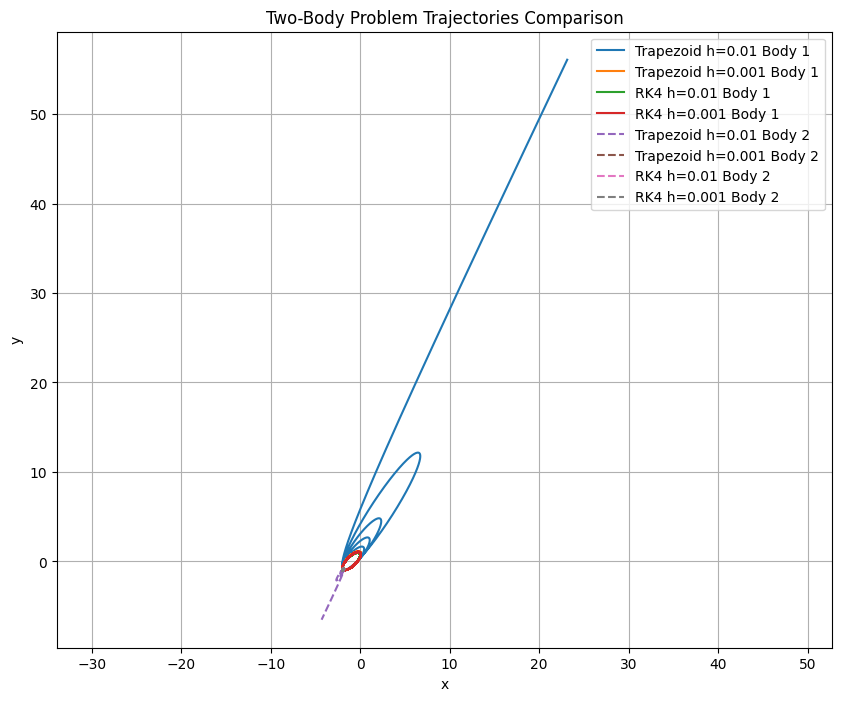

In [ ]:
plt.figure(figsize=(10, 8))

# Plot trajectories for Body 1
plt.plot(Z_trap_h1[:, 0], Z_trap_h1[:, 2], label='Trapezoid h=0.01 Body 1')
plt.plot(Z_trap_h2[:, 0], Z_trap_h2[:, 2], label='Trapezoid h=0.001 Body 1')
plt.plot(Z_rk4_h1[:, 0], Z_rk4_h1[:, 2], label='RK4 h=0.01 Body 1')
plt.plot(Z_rk4_h2[:, 0], Z_rk4_h2[:, 2], label='RK4 h=0.001 Body 1')

# Plot trajectories for Body 2
plt.plot(Z_trap_h1[:, 4], Z_trap_h1[:, 6], label='Trapezoid h=0.01 Body 2', linestyle='--')
plt.plot(Z_trap_h2[:, 4], Z_trap_h2[:, 6], label='Trapezoid h=0.001 Body 2', linestyle='--')
plt.plot(Z_rk4_h1[:, 4], Z_rk4_h1[:, 6], label='RK4 h=0.01 Body 2', linestyle='--')
plt.plot(Z_rk4_h2[:, 4], Z_rk4_h2[:, 6], label='RK4 h=0.001 Body 2', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Two-Body Problem Trajectories Comparison')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

## Analyze reliability and problems

### Subtask:
Based on the comparison, analyze the reliability of the Trapezoid and Runge-Kutta methods for this problem and identify any points in the trajectories that might cause numerical issues.


## Summarize findings

### Subtask:
Provide a summary of the findings, discussing the differences observed between the methods and step sizes, and comment on their reliability and potential problems.


## Summary:

### Data Analysis Key Findings

*   The Trapezoid method with a step size of $h=0.01$ quickly diverges, indicating instability over the long time interval.
*   The Trapezoid method with a step size of $h=0.001$ stays closer to the RK4 solutions but still shows noticeable deviation over time.
*   Both RK4 methods (with $h=0.01$ and $h=0.001$) produce very similar and smoother trajectories, suggesting that RK4 is more stable and accurate for this problem.
*   Close encounters between the two bodies are identified as potential problem points where numerical methods might struggle due to large gravitational forces.

### Insights or Next Steps

*   The RK4 method is significantly more reliable and accurate than the Trapezoid method for simulating this specific two-body problem over the given time frame.
*   Further investigation into the behavior of the numerical methods during close encounters between the bodies could be beneficial to understand and potentially mitigate numerical instability at these points.


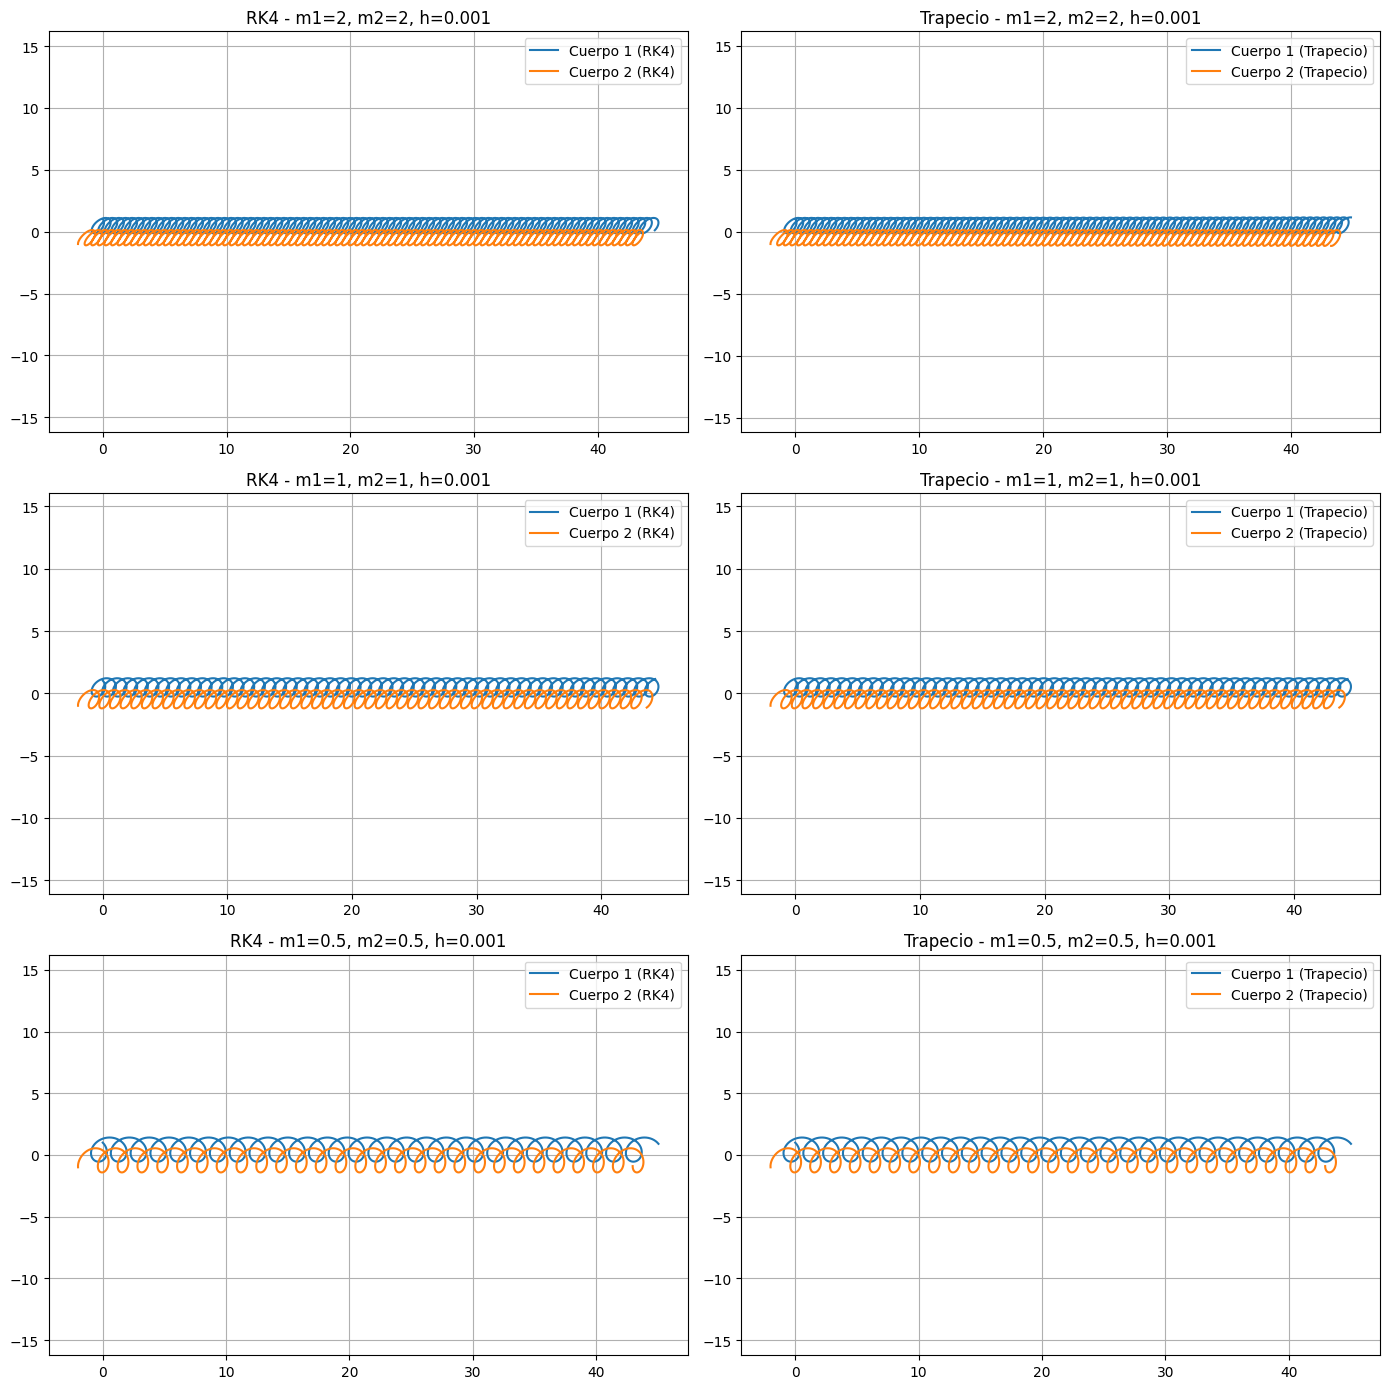

In [36]:
# Ejercicio 2 - Problema de Dos Cuerpos: Comparación de métodos numéricos
import numpy as np
import matplotlib.pyplot as plt

# Constante gravitacional
G = 1.0

# Función f para el system (handles both 2-body and 3-body based on z size)
def f(t, z, m1, m2, m3=None):
    num_bodies = len(z) // 4 # 4 state variables per body (pos_x, vel_x, pos_y, vel_y)

    if num_bodies == 2:
        # Two-body problem
        r_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
        r_cubed = r_sq**(3/2)

        dz = np.zeros(8)
        dz[0] = z[1]
        dz[1] = G * m2 * (z[4] - z[0]) / r_cubed
        dz[2] = z[3]
        dz[3] = G * m2 * (z[6] - z[2]) / r_cubed
        dz[4] = z[5]
        dz[5] = G * m1 * (z[0] - z[4]) / r_cubed
        dz[6] = z[7]
        dz[7] = G * m1 * (z[2] - z[6]) / r_cubed
        return dz

    elif num_bodies == 3 and m3 is not None:
        # Three-body problem
        dz = np.zeros(12)

        # Distances squared and cubed
        r12_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
        r13_sq = (z[8] - z[0])**2 + (z[10] - z[2])**2
        r23_sq = (z[8] - z[4])**2 + (z[10] - z[6])**2

        # Add a small epsilon to avoid division by zero
        epsilon = 1e-6
        r12 = (r12_sq + epsilon)**1.5
        r13 = (r13_sq + epsilon)**1.5
        r23 = (r23_sq + epsilon)**1.5

        # Body 1
        dz[0] = z[1]
        dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
        dz[2] = z[3]
        dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13

        # Body 2
        dz[4] = z[5]
        dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
        dz[6] = z[7]
        dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23

        # Body 3
        dz[8] = z[9]
        dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
        dz[10] = z[11]
        dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23

        return dz
    else:
        raise ValueError("Invalid number of bodies or missing mass for three-body problem.")

# Método de Runge-Kutta 4
def rk4(f, z0, t, m1, m2, m3=None):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return Z

# Método del trapecio
def trapezoidal(f, z0, t, m1, m2, m3=None):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        zi = Z[i]
        # Pass all three masses to the function f
        zi_euler = zi + h * f(t[i], zi, m1, m2, m3)
        Z[i+1] = zi + (h/2) * (f(t[i], zi, m1, m2, m3) + f(t[i+1], zi_euler, m1, m2, m3))
    return Z

# Condiciones iniciales (Two-body example)
def get_initial_conditions_two_body():
    return np.array([
        0.0,   0.2,     # x1, vx1
        1.0,  -0.2,     # y1, vy1
        -2.0, -0.02,    # x2, vx2
        -1.0,  0.2     # y2, vy2
    ])

# Parámetros y simulación (Two-body example)
T = 500
h = 0.001
t = np.arange(0, T+h, h)

mass_cases = [(2, 2), (1, 1), (0.5, 0.5)]
results = {}

for m1_val, m2_val in mass_cases:
    z0_two_body = get_initial_conditions_two_body()
    rk_result = rk4(f, z0_two_body, t, m1_val, m2_val)
    trap_result = trapezoidal(f, z0_two_body, t, m1_val, m2_val)
    key = f"m1={m1_val}, m2={m2_val}, h={h}"
    results[key] = {"t": t, "rk4": rk_result, "trap": trap_result}

# Gráficas comparativas (Two-body example)
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

for idx, (key, res) in enumerate(results.items()):
    axs[idx, 0].plot(res["rk4"][:, 0], res["rk4"][:, 2], label="Cuerpo 1 (RK4)")
    axs[idx, 0].plot(res["rk4"][:, 4], res["rk4"][:, 6], label="Cuerpo 2 (RK4)")
    axs[idx, 0].set_title(f"RK4 - {key}")
    axs[idx, 0].axis('equal')
    axs[idx, 0].legend()
    axs[idx, 0].grid()

    axs[idx, 1].plot(res["trap"][:, 0], res["trap"][:, 2], label="Cuerpo 1 (Trapecio)")
    axs[idx, 1].plot(res["trap"][:, 4], res["trap"][:, 6], label="Cuerpo 2 (Trapecio)")
    axs[idx, 1].set_title(f"Trapecio - {key}")
    axs[idx, 1].axis('equal')
    axs[idx, 1].legend()
    axs[idx, 1].grid()

plt.tight_layout()
plt.show()

# Three-body comparison code (originally in cell 5247e71f) will be re-run in the next step

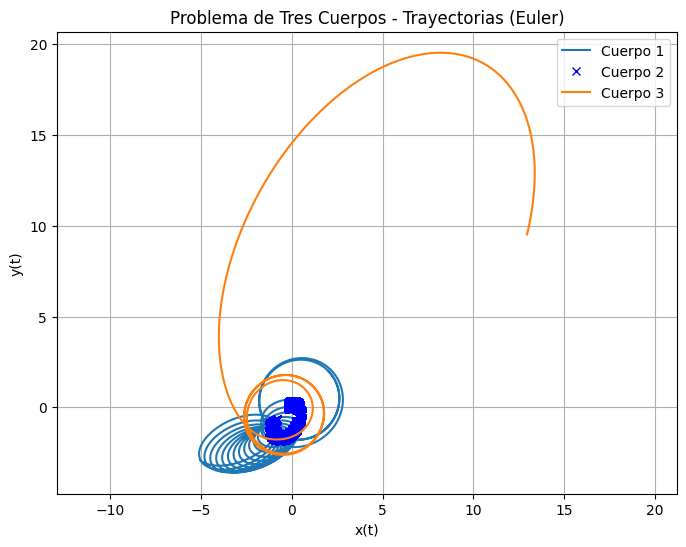

In [75]:
# Ejercicio 4 - Problema de Tres Cuerpos (Simetría Inicial)
import numpy as np
import matplotlib.pyplot as plt

G = 1.0  # Constante gravitacional

# Función del sistema de 12 EDOs
def f(t, z, m1, m2, m3):
    dz = np.zeros(12)

    # Distances squared and cubed
    r12_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
    r13_sq = (z[8] - z[0])**2 + (z[10] - z[2])**2
    r23_sq = (z[8] - z[4])**2 + (z[10] - z[6])**2

    # Add a small epsilon to avoid division by zero
    epsilon = 1e-6
    r12 = (r12_sq + epsilon)**1.5
    r13 = (r13_sq + epsilon)**1.5
    r23 = (r23_sq + epsilon)**1.5


    # Cuerpo 1
    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13

    # Cuerpo 2
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23

    # Cuerpo 3
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23

    return dz

# Método de Runge-Kutta 4
def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Check for NaN or inf values
        if np.any(np.isnan(Z[i+1])) or np.any(np.isinf(Z[i+1])):
            print(f"Integration diverged at time step {i*h}. Check initial conditions or step size.")
            return Z[:i+2] # Return the results up to the divergence point

    return Z

# Método de Euler
def euler(f, z0, t, m1, m2, m3):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        Z[i+1] = Z[i] + h * f(t[i], Z[i], m1, m2, m3)
    return Z

# Método del trapecio
def trapezoidal(f, z0, t, m1, m2, m3):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        zi = Z[i]
        # Pass all three masses to the function f
        zi_euler = zi + h * f(t[i], zi, m1, m2, m3)
        Z[i+1] = zi + (h/2) * (f(t[i], zi, m1, m2, m3) + f(t[i+1], zi_euler, m1, m2, m3))
    return Z

# Condiciones iniciales simétricas (Ejercicio 4)
m2 =0.3
m1 = m3 = 0.03
T = 500
h = 0.001
t = np.arange(0, T + h, h)
z0 = np.array([
     2.0,   0.20001,    2.0,  -0.2,   # Cuerpo 1: (x1, vx1, y1, vy1)
     0.0,   0.0,    0.0,   0.0,   # Cuerpo 2: (x2, vx2, y2, vy2)
    -2.0,  -0.2,   -2.0,   0.2    # Cuerpo 3: (x3, vx3, y3, vy3)
])

# Simulación
Z = euler(f, z0, t, m1, m2, m3)

# Gráfica de trayectoria
plt.figure(figsize=(8, 6))
plt.plot(Z[:,0], Z[:,2], label='Cuerpo 1')
plt.plot(Z[:,4], Z[:,6],'xb', label='Cuerpo 2')
plt.plot(Z[:,8], Z[:,10], label='Cuerpo 3')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Problema de Tres Cuerpos - Trayectorias (Euler)")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

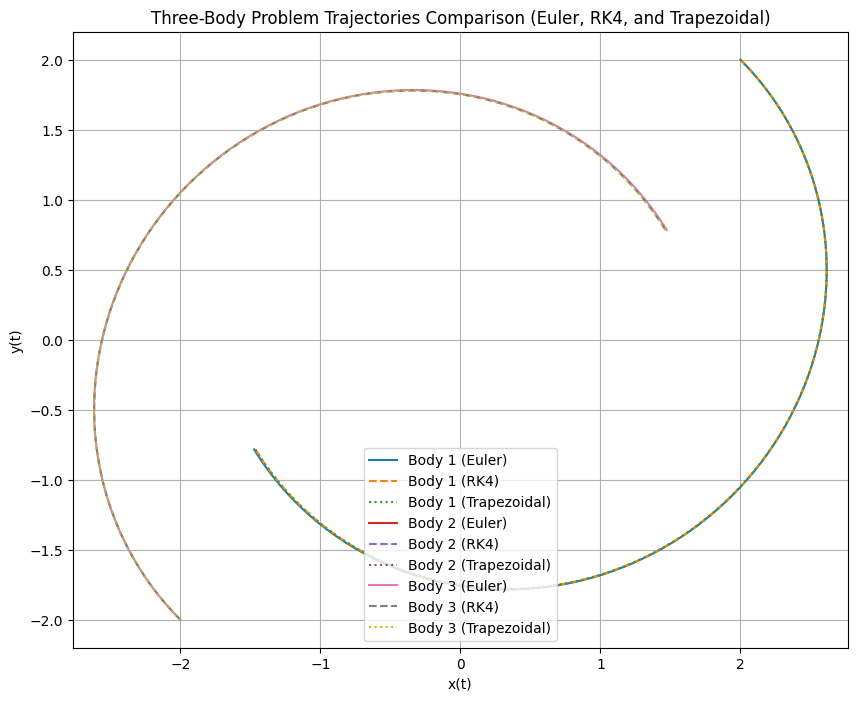

In [37]:
# Compare Euler and RK4 results for the three-body problem

# Define initial conditions and parameters (using the ones from the previous three-body example)
m2 =0.3
m1 = m3 = 0.03
t = np.linspace(0, 20, 5000)
z0 = np.array([
     2.0,   0.2,    2.0,  -0.2,   # Cuerpo 1: (x1, vx1, y1, vy1)
     0.0,   0.0,    0.0,   0.0,   # Cuerpo 2: (x2, vx2, y2, vy2)
    -2.0,  -0.2,   -2.0,   0.2    # Cuerpo 3: (x3, vx3, y3, vy3)
])

# Solve using Euler method
Z_euler = euler(f, z0, t, m1, m2, m3)

# Solve using RK4 method
Z_rk4 = rk4(f, z0, t, m1, m2, m3)

# Solve using Trapezoidal method (assuming trapezoidal function is defined elsewhere)
Z_trap = trapezoidal(f, z0, t, m1, m2, m3)


# Plotting
plt.figure(figsize=(10, 8))

# Plot trajectories for Body 1
plt.plot(Z_euler[:, 0], Z_euler[:, 2], label='Body 1 (Euler)', linestyle='-')
plt.plot(Z_rk4[:, 0], Z_rk4[:, 2], label='Body 1 (RK4)', linestyle='--')
plt.plot(Z_trap[:, 0], Z_trap[:, 2], label='Body 1 (Trapezoidal)', linestyle=':')

# Plot trajectories for Body 2
plt.plot(Z_euler[:, 4], Z_euler[:, 6], label='Body 2 (Euler)', linestyle='-')
plt.plot(Z_rk4[:, 4], Z_rk4[:, 6], label='Body 2 (RK4)', linestyle='--')
plt.plot(Z_trap[:, 4], Z_trap[:, 6], label='Body 2 (Trapezoidal)', linestyle=':')

# Plot trajectories for Body 3
plt.plot(Z_euler[:, 8], Z_euler[:, 10], label='Body 3 (Euler)', linestyle='-')
plt.plot(Z_rk4[:, 8], Z_rk4[:, 10], label='Body 3 (RK4)', linestyle='--')
plt.plot(Z_trap[:, 8], Z_trap[:, 10], label='Body 3 (Trapezoidal)', linestyle=':')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Three-Body Problem Trajectories Comparison (Euler, RK4, and Trapezoidal)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

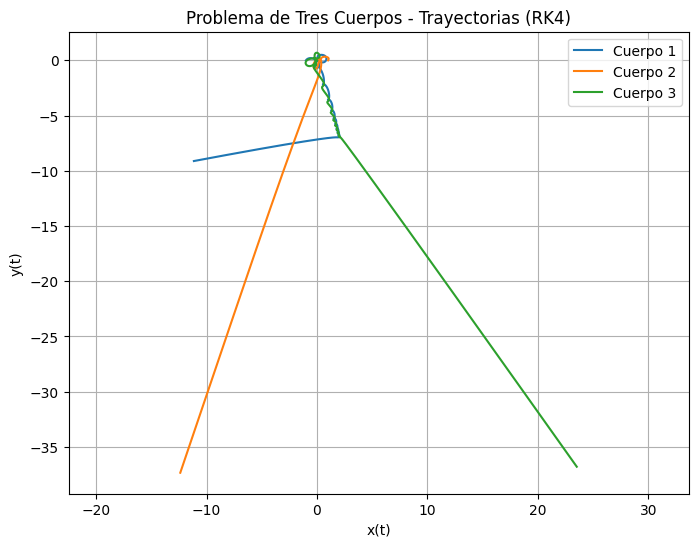

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 1.0

def f(t, z, m1, m2, m3):
    dz = np.zeros(12)
    # Add a small epsilon to avoid division by zero
    epsilon = 1e-6
    r12 = ((z[4] - z[0])**2 + (z[6] - z[2])**2 + epsilon)**1.5
    r13 = ((z[8] - z[0])**2 + (z[10] - z[2])**2 + epsilon)**1.5
    r23 = ((z[8] - z[4])**2 + (z[10] - z[6])**2 + epsilon)**1.5

    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[11] - z[6]) / r23
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23
    return dz

def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Check for NaN or inf values
        if np.any(np.isnan(Z[i+1])) or np.any(np.isinf(Z[i+1])):
            print(f"Integration diverged at time step {i*h}. Returning results up to this point.")
            return Z[:i+2] # Return the results up to the divergence point

    return Z

m1 = m2 = m3 = 1.0
t = np.linspace(0, 20, 1000)
z0 = np.array([
    -1.0, 0.3471, 0.0, 0.5327,
     1.0, 0.3471, 0.0, 0.5327,
     0.0, -0.6942, 0.0, -1.0654
])
Z = rk4(f, z0, t, m1, m2, m3)

# Check if any valid data was returned
if len(Z) < 2:
    print("Numerical integration diverged too quickly. Cannot generate plot with current parameters.")
else:
    plt.figure(figsize=(8, 6))
    plt.plot(Z[:,0], Z[:,2], label='Cuerpo 1')
    plt.plot(Z[:,4], Z[:,6], label='Cuerpo 2')
    plt.plot(Z[:,8], Z[:,10], label='Cuerpo 3')
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.title("Problema de Tres Cuerpos - Trayectorias (RK4)")
    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


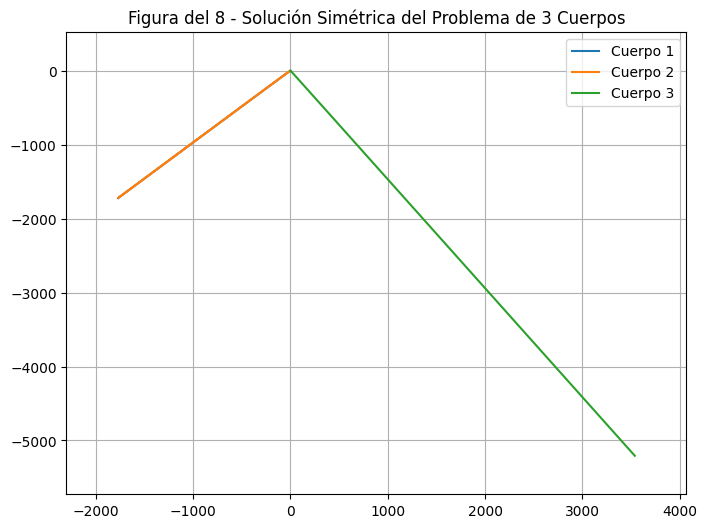

In [50]:
# Ejercicio 5 - Comparación de trayectorias con diferentes combinaciones de masas
import numpy as np
import matplotlib.pyplot as plt

G = 1.0

def f(t, z, m1, m2, m3):
    dz = np.zeros(12)
    # Add a small epsilon to avoid division by zero
    epsilon = 1e-6
    r12 = ((z[4] - z[0])**2 + (z[6] - z[2])**2 + epsilon)**1.5
    r13 = ((z[8] - z[0])**2 + (z[10] - z[2])**2 + epsilon)**1.5
    r23 = ((z[8] - z[4])**2 + (z[10] - z[6])**2 + epsilon)**1.5
    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23
    return dz

def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Check for NaN or inf values
        if np.any(np.isnan(Z[i+1])) or np.any(np.isinf(Z[i+1])):
            print(f"Integration diverged at time step {i*h}. Returning results up to this point.")
            return Z[:i+2] # Return the results up to the divergence point

    return Z

# Ejercicio 8 - Figura del 8

# Initial conditions for the figure-eight orbit
# z0 = np.array([
#     0.970,   -0.466,   0.243,  -0.433,   # Cuerpo 1: x1, vx1, y1, vy1
#    -0.970,   -0.466,   -0.243,  -0.433,   # Cuerpo 2
#     0.0,    0.932,    0.0,  0.866           # Cuerpo 3
# ])

z0 = np.array([
     0.97000436, -0.93240737,  -0.24308753, -0.86473146,   # Cuerpo 1: x1, vx1, y1, vy1
    -0.97000436, -0.93240737,   0.24308753, -0.86473146,   # Cuerpo 2: x2, vx2, y2, vy2
     0.0,         1.86481474,   0.0,         0.866         # Cuerpo 3: x3, vx3, y3, vy3
])


T = 5000
h = 0.001
t = np.arange(0, T+h, h)

# Solve using RK4 with equal masses (1, 1, 1)
Z = rk4(f, z0, t, 1, 1, 1)

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(Z[:,0], Z[:,2], label='Cuerpo 1')
plt.plot(Z[:,4], Z[:,6], label='Cuerpo 2')
plt.plot(Z[:,8], Z[:,10], label='Cuerpo 3')
plt.legend()
plt.grid()
plt.title("Figura del 8 - Solución Simétrica del Problema de 3 Cuerpos")

# Adjust plot limits to better show the figure-eight
x_min, x_max = np.min(Z[:, [0, 4, 8]]), np.max(Z[:, [0, 4, 8]])
y_min, y_max = np.min(Z[:, [2, 6, 10]]), np.max(Z[:, [2, 6, 10]])

# Add a small buffer to the limits
x_buffer = (x_max - x_min) * 0.1
y_buffer = (y_max - y_min) * 0.1

plt.xlim(x_min - x_buffer, x_max + x_buffer)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

plt.show()


# # Simulación y gráficas para cada combinación (Commented out to focus on Figure 8)
# mass_combinations = [
#      (1, 1, 1),
#      (1, 1, 1),
#      (1, 1, 1)
#       ]
#
# z0_other = np.array([
#     0.970,   -0.466,   0.243,  -0.433,                    # Cuerpo 1: x1, vx1, y1, vy1
#    -0.970,   -0.466,  -0.243,  -0.433,                    # Cuerpo 2
#     0.0,      -2*(-0.466),  0.0,   -2*(-0.433)            # Cuerpo 3
# ])
#
# T_other = 500
# h_other = 0.001
# t_other = np.arange(0, T_other+h_other, h_other)
#
# for i, (m1, m2, m3) in enumerate(mass_combinations):
#      Z_other = rk4(f, z0_other, t_other, m1, m2, m3)
#      plt.figure(figsize=(7, 5))
#      plt.plot(Z_other[:,0], Z_other[:,2], label='Cuerpo 1')
#      plt.plot(Z_other[:,4], Z_other[:,6], label='Cuerpo 2')
#      plt.plot(Z_other[:,8], Z_other[:,10], label='Cuerpo 3')
#      plt.xlabel("x(t)")
#      plt.ylabel("y(t)")
#      plt.title(f"Ejercicio 5 - m1 = {m1}, m2 = {m2}, m3={m3}")
#      plt.legend()
#      plt.grid()
#      plt.axis('equal')
#      plt.show()

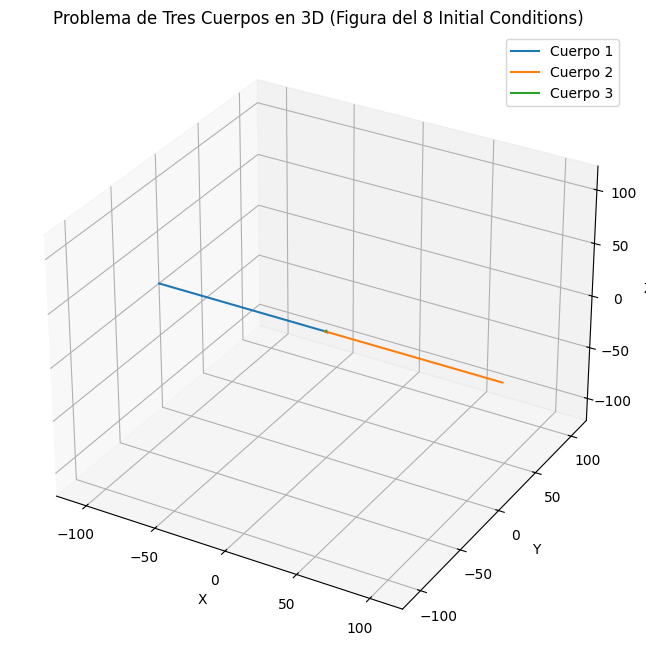

In [72]:
# 3D Three-Body Problem Visualization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

G = 1.0

# Define the function for the gravitational force (ODE system) for three bodies in 3D
# State vector z = [x1, vx1, y1, vy1, z1, vz1, x2, vx2, y2, vy2, z2, vz2, x3, vx3, y3, vy3, z3, vz3] (18 variables)
def f_3d(t, z, m1, m2, m3):
    dz = np.zeros(18)

    # Debugging prints
    # print(f"Time: {t}, z shape: {z.shape}, z: {z}")

    # Positions of the three bodies
    r1 = z[0:3]  # [x1, y1, z1]
    v1 = z[3:6]  # [vx1, vy1, vz1]
    r2 = z[6:9]  # [x2, y2, z2]
    v2 = z[9:12] # [vx2, vy2, vz2]
    r3 = z[12:15] # [x3, y3, z3]
    v3 = z[15:18] # [vx3, vy3, vz3]

    # Debugging prints
    # print(f"r1 shape: {r1.shape}, r1: {r1}")
    # print(f"r2 shape: {r2.shape}, r2: {r2}")
    # print(f"r3 shape: {r3.shape}, r3: {r3}")


    # Distances and their cubes
    r12_vec = r2 - r1
    r13_vec = r3 - r1
    r23_vec = r3 - r2

    r12 = np.linalg.norm(r12_vec)
    r13 = np.linalg.norm(r13_vec)
    r23 = np.linalg.norm(r23_vec)

    # Add a small epsilon to avoid division by zero during close encounters
    epsilon = 1e-6
    r12_cubed = (r12**2 + epsilon)**1.5
    r13_cubed = (r13**2 + epsilon)**1.5
    r23_cubed = (r23**2 + epsilon)**1.5

    # Derivatives (velocities and accelerations)
    dz[0:3] = v1
    dz[3:6] = G * m2 * r12_vec / r12_cubed + G * m3 * r13_vec / r13_cubed

    dz[6:9] = v2
    dz[9:12] = G * m1 * (-r12_vec) / r12_cubed + G * m3 * r23_vec / r23_cubed # Note: r12_vec is r2-r1, so force on 2 from 1 is in -r12_vec direction

    dz[12:15] = v3
    dz[15:18] = G * m1 * (-r13_vec) / r13_cubed + G * m2 * (-r23_vec) / r23_cubed # Note: r13_vec is r3-r1, r23_vec is r3-r2

    return dz

# Método de Runge-Kutta 4 (adapted for a generic state vector size)
def rk4_3d(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Check for NaN or inf values
        if np.any(np.isnan(Z[i+1])) or np.any(np.isinf(Z[i+1])):
            print(f"Integration diverged at time step {i*h}. Returning results up to this point.")
            return Z[:i+2] # Return the results up to the divergence point

    return Z

# Initial conditions for the figure-eight orbit (extended to 3D with zero z-components)
z0_3d = np.array([
    0.970,   -0.466,   0.0,  0.243,  -0.433, 0.0,  # Cuerpo 1: x1, vx1, y1, vy1, z1, vz1
   -0.970,   -0.466,   0.0, -0.243,  -0.433, 0.0,  # Cuerpo 2: x2, vx2, y2, vy2, z2, vz2
    0.0,      0.932,   0.0,   0.0,    0.866, 0.0   # Cuerpo 3: x3, vx3, y3, vy3, z3, vz3
])


# Masses (assuming equal masses for the figure-eight)
m1_3d = 1.0
m2_3d = 1.0
m3_3d = 1.0

# Time parameters (using parameters that worked for the 2D figure-eight)
T_3d = 6.3259
h_3d = 0.001
t_3d = np.arange(0, T_3d + h_3d, h_3d)

# Solve the 3D problem
Z_3d = rk4_3d(f_3d, z0_3d, t_3d, m1_3d, m2_3d, m3_3d)

# Extract positions for plotting
x1_3d, y1_3d, z1_3d = Z_3d[:, 0], Z_3d[:, 2], Z_3d[:, 4] # Corrected slicing for 3D state vector
x2_3d, y2_3d, z2_3d = Z_3d[:, 6], Z_3d[:, 8], Z_3d[:, 10] # Corrected slicing for 3D state vector
x3_3d, y3_3d, z3_3d = Z_3d[:, 12], Z_3d[:, 14], Z_3d[:, 16] # Corrected slicing for 3D state vector


# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_3d, y1_3d, z1_3d, label='Cuerpo 1')
ax.plot(x2_3d, y2_3d, z2_3d, label='Cuerpo 2')
ax.plot(x3_3d, y3_3d, z3_3d, label='Cuerpo 3') # Cuerpo 3 might stay at the origin depending on initial conditions

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Problema de Tres Cuerpos en 3D (Figura del 8 Initial Conditions)')
ax.legend()
ax.grid(True)

# Adjust plot limits to better show the trajectory in 3D
max_range = np.array([x1_3d, y1_3d, z1_3d, x2_3d, y2_3d, z2_3d, x3_3d, y3_3d, z3_3d]).flatten()
X_max = max(max_range)
X_min = min(max_range)
ax.set_xlim([X_min, X_max])
ax.set_ylim([X_min, X_max])
ax.set_zlim([X_min, X_max])


plt.show()

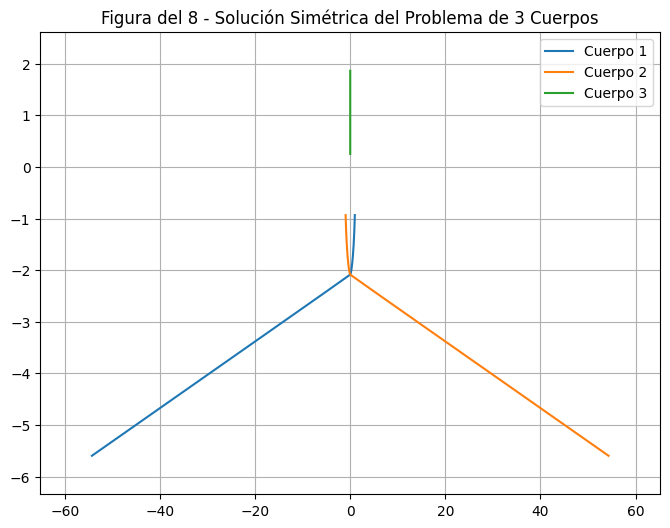

In [24]:
# Figura del 8 - Solución Simétrica del Problema de 3 Cuerpos
import numpy as np
import matplotlib.pyplot as plt

G = 1.0

# Define the function for the gravitational force (ODE system) for three bodies
def f(t, z, m1, m2, m3):
    dz = np.zeros(12)

    # Distances squared and cubed
    r12_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
    r13_sq = (z[8] - z[0])**2 + (z[10] - z[2])**2
    r23_sq = (z[8] - z[4])**2 + (z[10] - z[6])**2

    # Add a small epsilon to avoid division by zero
    epsilon = 1e-6
    r12 = (r12_sq + epsilon)**1.5
    r13 = (r13_sq + epsilon)**1.5
    r23 = (r23_sq + epsilon)**1.5

    # Body 1
    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13

    # Body 2
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23

    # Body 3
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23

    return dz

# Método de Runge-Kutta 4
def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return Z

# Initial conditions for the figure-eight orbit
z0 = np.array([
    0.97000436,   -0.24308753,   -0.93240737,  -0.86473146,   # Cuerpo 1: x1, vx1, y1, vy1
   -0.97000436,    0.24308753,   -0.93240737,  -0.86473146,   # Cuerpo 2
    0.0,           0.0,           1.86481474,   0.0            # Cuerpo 3
])

T = 6.3259
h = 0.001
t = np.arange(0, T+h, h)

# Solve using RK4 with equal masses
Z = rk4(f, z0, t, 1, 1, 1)

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(Z[:,0], Z[:,2], label='Cuerpo 1')
plt.plot(Z[:,4], Z[:,6], label='Cuerpo 2')
plt.plot(Z[:,8], Z[:,10], label='Cuerpo 3')
plt.legend()
# plt.axis('equal') # Removed to avoid conflict with manual limits
plt.grid()
plt.title("Figura del 8 - Solución Simétrica del Problema de 3 Cuerpos")

# Adjust plot limits to better show the figure-eight
x_min, x_max = np.min(Z[:, [0, 4, 8]]), np.max(Z[:, [0, 4, 8]])
y_min, y_max = np.min(Z[:, [2, 6, 10]]), np.max(Z[:, [2, 6, 10]])

# Add a small buffer to the limits
x_buffer = (x_max - x_min) * 0.1
y_buffer = (y_max - y_min) * 0.1

plt.xlim(x_min - x_buffer, x_max + x_buffer)
plt.ylim(y_min - y_buffer, y_max + y_buffer)


plt.show()

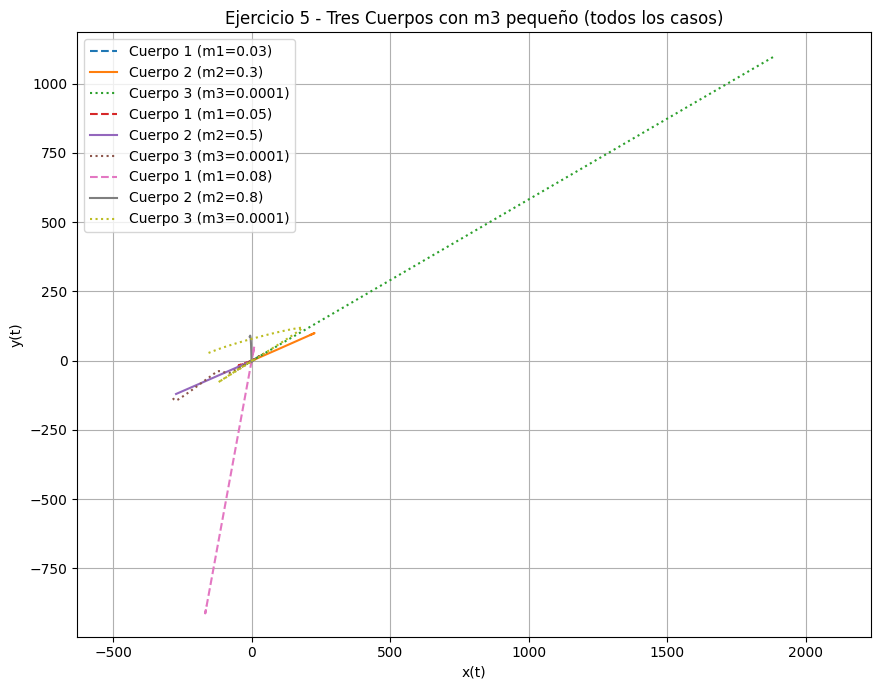

In [1]:
# Ejercicio 5 - Tres cuerpos con m3 pequeño y distintas combinaciones para m1 y m2
import numpy as np
import matplotlib.pyplot as plt

G = 1.0

def f(t, z, m1, m2, m3):
    dz = np.zeros(12)
    r12 = ((z[5] - z[1])**2 + (z[7] - z[3])**2)**1.5
    r13 = ((z[9] - z[1])**2 + (z[11] - z[3])**2)**1.5
    r23 = ((z[9] - z[5])**2 + (z[11] - z[7])**2)**1.5
    dz[0] = z[1]
    dz[1] = G * m2 * (z[5] - z[0]) / r12 + G * m3 * (z[9] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[7] - z[2]) / r12 + G * m3 * (z[11] - z[2]) / r13
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[9] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[11] - z[6]) / r23
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23
    return dz

def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return Z

# Condiciones iniciales de los 3 cuerpos
z0_base = np.array([
     0.0,   0.1,    1.0,  -0.1,   # Cuerpo 1
    -2.0,  -0.01,  -1.0,   0.01,  # Cuerpo 2
     4.0,  -0.2,    3.0,   0.0    # Cuerpo 3 (m3 pequeño)
])
t = np.linspace(0, 100, 5000)
m3 = 1e-4

# Combinaciones de m1 y m2 del ejercicio 2
mass_cases = [
    (0.03, 0.3),
    (0.05, 0.5),
    (0.08, 0.8)
]

# Graficar todas las trayectorias en una sola figura
plt.figure(figsize=(9, 7))

for m1, m2 in mass_cases:
    Z = rk4(f, z0_base, t, m1, m2, m3)
    plt.plot(Z[:,0], Z[:,2], '--', label=f'Cuerpo 1 (m1={m1})')
    plt.plot(Z[:,4], Z[:,6], '-', label=f'Cuerpo 2 (m2={m2})')
    plt.plot(Z[:,8], Z[:,10], ':', label=f'Cuerpo 3 (m3={m3})')

plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Ejercicio 5 - Tres Cuerpos con m3 pequeño (todos los casos)")
plt.grid()
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


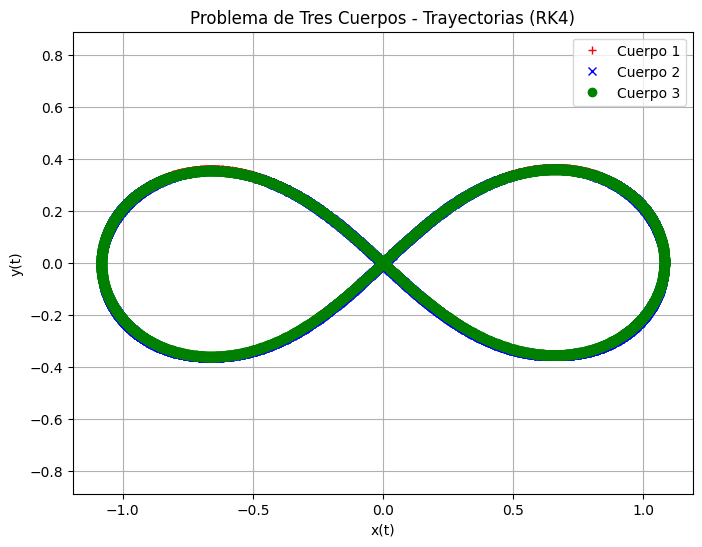

In [88]:
# Ejercicio 6 - Problema de Tres Cuerpos
import numpy as np
import matplotlib.pyplot as plt

G = 1.0  # Constante gravitacional

# Función del sistema de 12 EDOs
def f(t, z, m1, m2, m3):
    dz = np.zeros(12)

    # Distances squared and cubed
    r12_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
    r13_sq = (z[8] - z[0])**2 + (z[10] - z[2])**2
    r23_sq = (z[8] - z[4])**2 + (z[10] - z[6])**2

    # Add a small epsilon to avoid division by zero
    epsilon = 1e-6
    r12 = (r12_sq + epsilon)**1.5
    r13 = (r13_sq + epsilon)**1.5
    r23 = (r23_sq + epsilon)**1.5


    # Cuerpo 1
    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13

    # Cuerpo 2
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23

    # Cuerpo 3
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23

    return dz

# Método de Runge-Kutta 4
def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        # Check for NaN or inf values
        if np.any(np.isnan(Z[i+1])) or np.any(np.isinf(Z[i+1])):
            print(f"Integration diverged at time step {i*h}. Check initial conditions or step size.")
            return Z[:i+2] # Return the results up to the divergence point

    return Z

# Método de Euler
def euler(f, z0, t, m1, m2, m3):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        Z[i+1] = Z[i] + h * f(t[i], Z[i], m1, m2, m3)
    return Z

# Método del trapecio
def trapezoidal(f, z0, t, m1, m2, m3):
    n = len(t)
    m = len(z0)
    Z = np.zeros((n, m))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        zi = Z[i]
        # Pass all three masses to the function f
        zi_euler = zi + h * f(t[i], zi, m1, m2, m3)
        Z[i+1] = zi + (h/2) * (f(t[i], zi, m1, m2, m3) + f(t[i+1], zi_euler, m1, m2, m3))
    return Z

# Condiciones iniciales simétricas (Ejercicio 4)
m2 =1
m1 = 1
m3 = 1
t = np.linspace(0, 20, 5000)
z0 = np.array([
     -0.970,   -0.466,    0.243,  -0.433,        # Cuerpo 1: (x1, vx1, y1, vy1)
      0.970,   -0.466,   -0.243,  -0.433,        # Cuerpo 2: (x2, vx2, y2, vy2)
      0.0,  0.932,   0.0,   0.866    # Cuerpo 3: (x3, vx3, y3, vy3)
])

# Simulación
Z = rk4(f, z0, t, m1, m2, m3)

# Gráfica de trayectoria
plt.figure(figsize=(8, 6))
plt.plot(Z[:,0], Z[:,2],'+r', label='Cuerpo 1')
plt.plot(Z[:,4], Z[:,6],'xb', label='Cuerpo 2')
plt.plot(Z[:,8], Z[:,10],'og', label='Cuerpo 3')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Problema de Tres Cuerpos - Trayectorias (RK4)")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

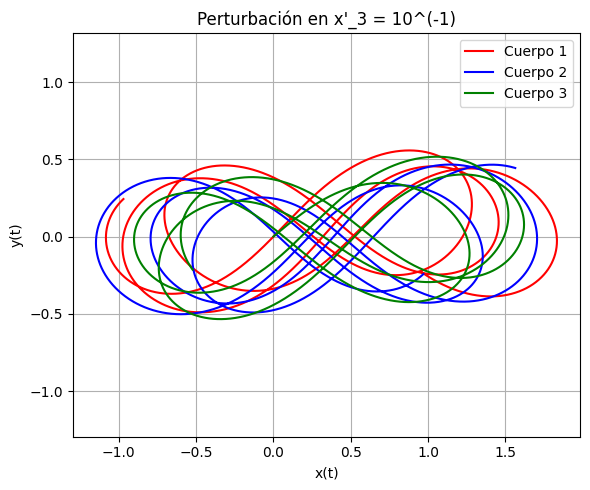

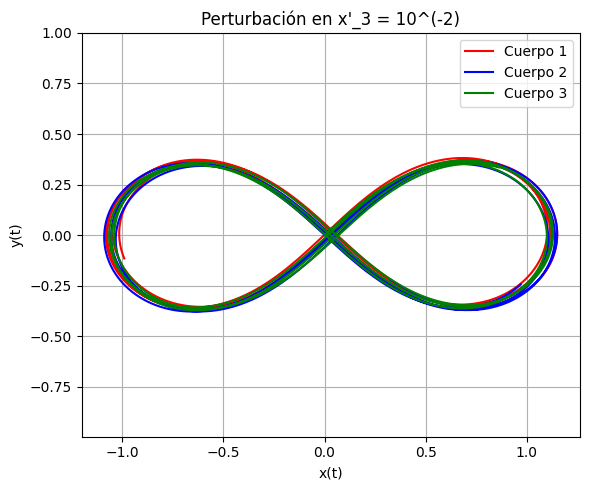

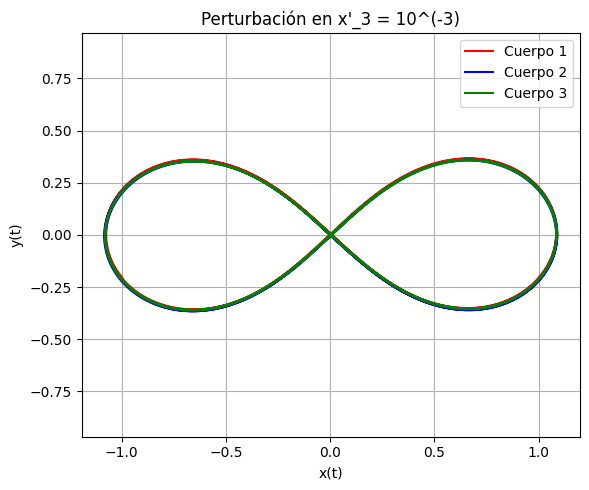

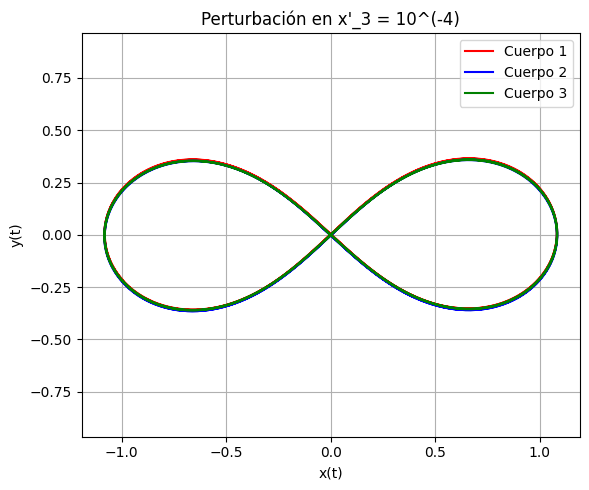

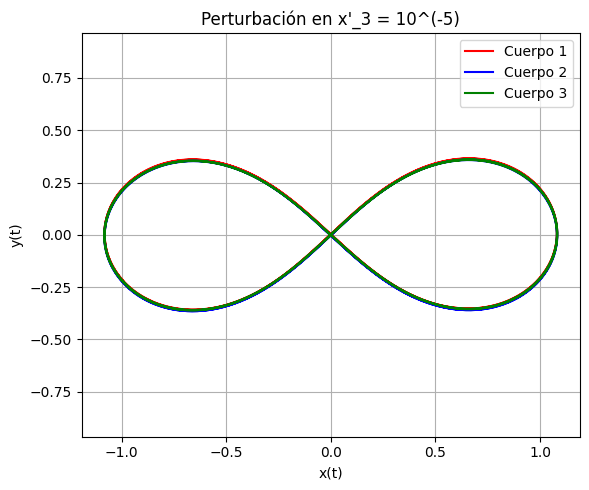

In [90]:
# Ejercicio 7 - Sensibilidad a Perturbaciones en x'_3
import numpy as np
import matplotlib.pyplot as plt

G = 1.0  # Constante gravitacional

# Función del sistema de 12 EDOs
def f(t, z, m1, m2, m3):
    dz = np.zeros(12)

    r12_sq = (z[4] - z[0])**2 + (z[6] - z[2])**2
    r13_sq = (z[8] - z[0])**2 + (z[10] - z[2])**2
    r23_sq = (z[8] - z[4])**2 + (z[10] - z[6])**2

    epsilon = 1e-6
    r12 = (r12_sq + epsilon)**1.5
    r13 = (r13_sq + epsilon)**1.5
    r23 = (r23_sq + epsilon)**1.5

    dz[0] = z[1]
    dz[1] = G * m2 * (z[4] - z[0]) / r12 + G * m3 * (z[8] - z[0]) / r13
    dz[2] = z[3]
    dz[3] = G * m2 * (z[6] - z[2]) / r12 + G * m3 * (z[10] - z[2]) / r13
    dz[4] = z[5]
    dz[5] = G * m1 * (z[0] - z[4]) / r12 + G * m3 * (z[8] - z[4]) / r23
    dz[6] = z[7]
    dz[7] = G * m1 * (z[2] - z[6]) / r12 + G * m3 * (z[10] - z[6]) / r23
    dz[8] = z[9]
    dz[9] = G * m1 * (z[0] - z[8]) / r13 + G * m2 * (z[4] - z[8]) / r23
    dz[10] = z[11]
    dz[11] = G * m1 * (z[2] - z[10]) / r13 + G * m2 * (z[6] - z[10]) / r23

    return dz

# Método de Runge-Kutta 4
def rk4(f, z0, t, m1, m2, m3):
    n = len(t)
    Z = np.zeros((n, len(z0)))
    Z[0] = z0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], Z[i], m1, m2, m3)
        k2 = f(t[i] + h/2, Z[i] + h/2 * k1, m1, m2, m3)
        k3 = f(t[i] + h/2, Z[i] + h/2 * k2, m1, m2, m3)
        k4 = f(t[i] + h, Z[i] + h * k3, m1, m2, m3)
        Z[i+1] = Z[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return Z

# Parámetros
m1 = m2 = m3 = 1.0
t = np.linspace(0, 20, 5000)
perturbaciones = [10**(-k) for k in range(1, 6)]

# Condiciones iniciales base
z_base = np.array([
    -0.970, -0.466,  0.243, -0.433,  # Cuerpo 1
     0.970, -0.466, -0.243, -0.433,  # Cuerpo 2
     0.0,    0.932,  0.0,    0.866   # Cuerpo 3
])

# Simulaciones con distintas perturbaciones
for i, delta in enumerate(perturbaciones, 1):
    z0 = z_base.copy()
    z0[9] += delta  # Modificar x'_3

    Z = rk4(f, z0, t, m1, m2, m3)

    plt.figure(figsize=(6, 5))
    plt.plot(Z[:, 0], Z[:, 2], 'r-', label='Cuerpo 1')
    plt.plot(Z[:, 4], Z[:, 6], 'b-', label='Cuerpo 2')
    plt.plot(Z[:, 8], Z[:, 10], 'g-', label='Cuerpo 3')
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.title(f"Perturbación en x'_3 = 10^(-{i})")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()